In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('ggplot')

In [2]:
def __sst(y_no_fitting):
    """
    计算SST(total sum of squares) 总平方和
    :param y_no_predicted: List[int] or array[int] 待拟合的y
    :return: 总平方和SST
    """
    y_mean = sum(y_no_fitting) / len(y_no_fitting)
    s_list = [(y - y_mean) ** 2 for y in y_no_fitting]
    sst = sum(s_list)
    return sst


def __ssr(y_fitting, y_no_fitting):
    """
    计算SSR(regression sum of squares) 回归平方和
    :param y_fitting: List[int] or array[int]  拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 回归平方和SSR
    """
    y_mean = sum(y_no_fitting) / len(y_no_fitting)
    s_list = [(y - y_mean) ** 2 for y in y_fitting]
    ssr = sum(s_list)
    return ssr


def __sse(y_fitting, y_no_fitting):
    """
    计算SSE(error sum of squares) 残差平方和
    :param y_fitting: List[int] or array[int] 拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 残差平方和SSE
    """
    s_list = [(y_fitting[i] - y_no_fitting[i]) ** 2 for i in range(len(y_fitting))]
    sse = sum(s_list)
    return sse


def goodness_of_fit(y_fitting, y_no_fitting):
    """
    计算拟合优度R^2
    :param y_fitting: List[int] or array[int] 拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 拟合优度R^2
    """
    SSR = __ssr(y_fitting, y_no_fitting)
    SST = __sst(y_no_fitting)
    rr = SSR / SST
    return rr

In [3]:
points = np.array(
    [9.1900,
     23.9000,
     16.0600,
     2.6700,
     5.1500,
     8.1200,
     3.8800,
     4.3000,
     3.2800,
     9.3300,
     3.9800,
     9.4500,
     3.2600,
     4.4900,
     7.1200,
     10.4700,
     5.6800,
     12.7300,
     26.6400,
     7.3200,
     5.1500,
     40.2500,
     11.1700,
     3.6900,
     4.8600,
     7.2200,
     13.3000,
     5.5400,
     5.3600,
     4.7900,
     12.7600,
     10.7200,
     7.1600,
     10.9200,
     5.8900,
     4.6700,
     18.1000,
     29.1000,
     9.6000,
     4.0300,
     5.2000,
     6.2800,
     5.8400,
     3.9300,
     4.6700,
     16.8900,
     19.5600,
     7.5900,
     4.7100,
     4.1700,
     5.9700,
     7.8100,
     2.9800,
     5.0100,
     7.6300,
     4.5900,
     9.0100,
     5.6400,
     2.5100,
     14.8200,
     10.2100,
     5.2200,
     3.5700,
     7.9800,
     3.4700,
     5.1800,
     4.1200,
     4.0400,
     5.4200,
     36.4400,
     7.5600,
     8.8400,
     12.1900,
     6.3400,
     24.4000,
     3.8800,
     3.7800,
     11.1800,
     5.4600,
     6.0500,
     12.1800,
     4.4700,
     3.5300,
     4.0700,
     4.3400,
     4.0400,
     1.8700,
     4.4300,
     2.9400,
     39.5500,
     3.2200,
     5.1900,
     2.4800,
     8.3000,
     4.8700,
     5.5800,
     5.2700,
     9.2700,
     7.5500,
     15.5000])


In [4]:
points_top = points.copy()[30:60]

In [5]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

In [6]:
# points_top = standardization(points_top)

In [7]:
points_top

array([12.76, 10.72,  7.16, 10.92,  5.89,  4.67, 18.1 , 29.1 ,  9.6 ,
        4.03,  5.2 ,  6.28,  5.84,  3.93,  4.67, 16.89, 19.56,  7.59,
        4.71,  4.17,  5.97,  7.81,  2.98,  5.01,  7.63,  4.59,  9.01,
        5.64,  2.51, 14.82])

In [8]:
x = [i for i in range(points_top.size)]
y = [points_top[i] for i in range(points_top.size)]
poly_fit = np.polyfit(x, y, 3)
print("拟合系数为：", poly_fit)
poly_fit_polynomial = np.poly1d(poly_fit)
print("拟合多项式为：", poly_fit_polynomial)
poly_fit_polynomial_calculationResults = poly_fit_polynomial(x)
poly_fit_polynomial_calculationResults_next = poly_fit_polynomial([i for i in range(points_top.size + 1)])
print("使用拟合多项式计算出结果为：", poly_fit_polynomial_calculationResults)

拟合系数为： [ 1.91004876e-03 -7.72815634e-02  6.04891436e-01  9.81156745e+00]
拟合多项式为：          3           2
0.00191 x - 0.07728 x + 0.6049 x + 9.812
使用拟合多项式计算出结果为： [ 9.81156745 10.34108737 10.72750446 10.982279   11.1168713  11.14274164
 11.07135031 10.91415762 10.68262384 10.38820928 10.04237423  9.65657897
  9.2422838   8.81094902  8.37403492  7.94300179  7.52930991  7.1444196
  6.79979112  6.50688479  6.27716089  6.12207972  6.05310156  6.08168671
  6.21929547  6.47738812  6.86742496  7.40086627  8.08917236  8.94380352]


In [9]:
# poly_fit_polynomial_calculationResults_next

0.09845437549724283


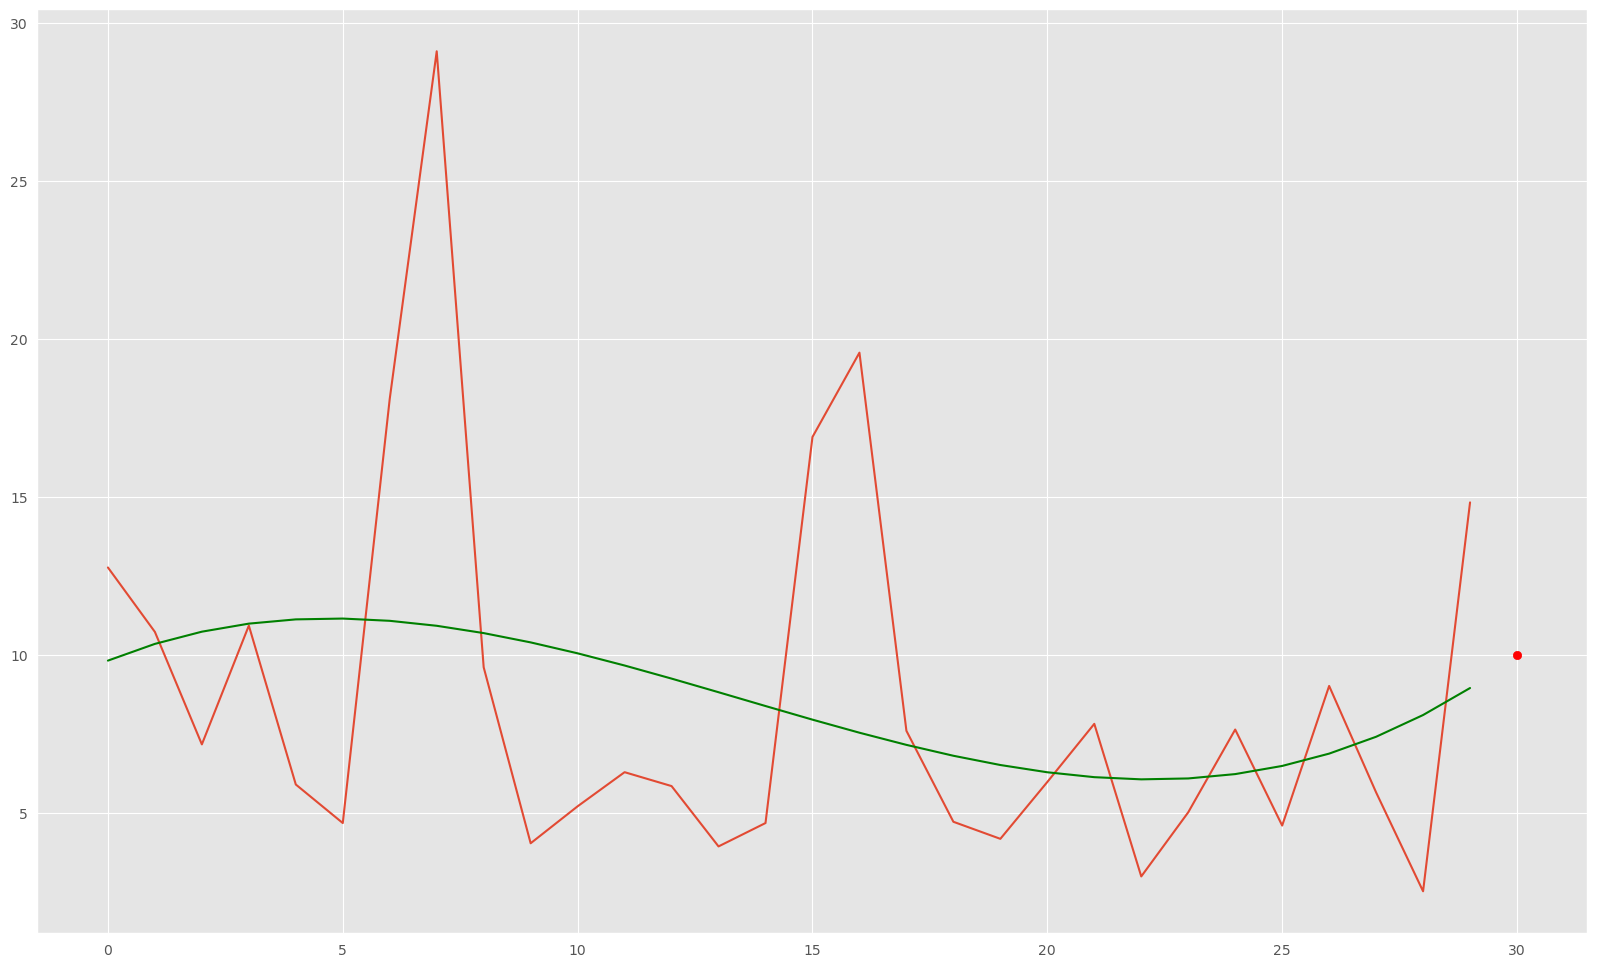

In [10]:
figure1 = plt.figure(figsize=(20, 12))
plt.plot(points_top)
rr1 = goodness_of_fit(poly_fit_polynomial_calculationResults, y)
print(rr1)
# plt.plot(points, color='blue')
plt.plot(poly_fit_polynomial_calculationResults, color='green')
plt.scatter(poly_fit_polynomial_calculationResults_next.size - 1, poly_fit_polynomial_calculationResults_next[-1],
            color='red')
plt.show()


In [11]:
pd.DataFrame(points_top)

,0
0,12.76
1,10.72
2,7.16
3,10.92
4,5.89
5,4.67
6,18.10
7,29.10
8,9.60
9,4.03


<Axes: >

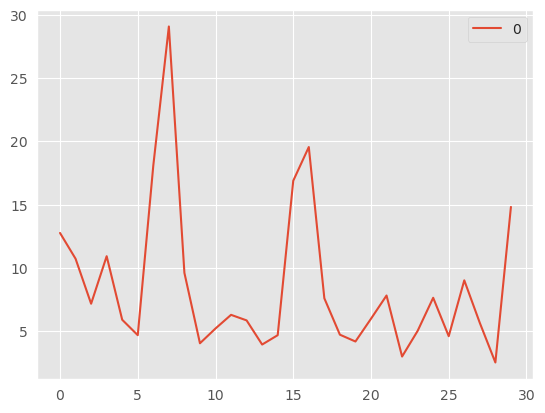

In [12]:


sns.lineplot(data=pd.DataFrame(points_top))
